**Задача проектной работы**

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что пользователь больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество анкет пользователей. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
* 1) выделить целевые группы клиентов;
* 2) предложить меры по снижению оттока;
* 3) определить другие особенности взаимодействия с клиентами.


**Данные**
* 'Churn' — факт оттока в текущем месяце;

Текущие поля в датасете:
* Данные пользователя за предыдущий до проверки факта оттока месяц:
* `gender` — пол
* `Near_Location` — проживание или работа в районе, где находится фитнес-центр
* `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)
* `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
* `Phone` — наличие контактного телефона
* `Age` — возраст
* `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах)

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
* `Contract_period — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
* `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах)
* `Group_visits` — факт посещения групповых занятий
* `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента
* `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц
* `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон



## Шаг 1: Загрузка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import transforms
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import sklearn.metrics as metrics

In [3]:
df = pd.read_csv("https://code.s3.yandex.net/datasets/gym_churn.csv")
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 200)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
dfs_dict = {'df':df}
for name_, df_ in dfs_dict.items():
    print('\033[1m'+f'INFO {name_}'+'\033[0m', end='\n\n')
    print(df_.info(), end='\n\n')
    print('\033[1m'+f'Initial Duplicates in {name_}: '+'\033[0m', df_.duplicated().sum(), end='\n\n')
    if df_.duplicated().sum() > 0:
        df_.drop_duplicates(inplace=True)
        print('\033[1m'+f'Final Duplicates  in {name_}: '+'\033[0m', df_.duplicated().sum(), end='\n\n')
    print('\033[1m'+f'Number of NULLs in {name_}:'+'\033[0m\n', df_.isna().sum(), end='\n\n')
    df_.columns = df_.columns.str.lower().str.replace(' ', '_')
    print('\033[1m'+f'Columns in {name_}:'+'\033[0m\n', df_.columns)
    display(df_.head(3))
    print('='*60)
    print('\033[1m'+f'Number of properties in {name_}:'+'\033[0m\n', len(df.columns))
    print('='*60)

INFO df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-nul

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0


Number of properties in df:
 14


### **Вывод**
* Данные представлены в одном файле
* Пропуски отсуствуют
* Дубликаты отсутствуют
* Названия колонок преобразованы в соответствии с требованиями ***snake_style***
* В данных присутсвуют признаки в кол-ве 14 в виде целых и действительных чисел

## Шаг 1. Исследовательский анализ

In [5]:
df.describe().T[['mean', 'std']]  # среднее значение стандартное отклонение признаков

,mean,std
gender,0.510250,0.499957
near_location,0.845250,0.361711
partner,0.486750,0.499887
promo_friends,0.308500,0.461932
phone,0.903500,0.295313
contract_period,4.681250,4.549706
group_visits,0.412250,0.492301
age,29.184250,3.258367
avg_additional_charges_total,146.943728,96.355602
month_to_end_contract,4.322750,4.191297


In [6]:
churn_mean = df.groupby('churn').agg({'mean'}).T  # среднее значение признаков с группировкой по оттоку
churn_mean.columns = ['in','gone']
churn_mean = churn_mean.reset_index().drop('level_1', axis=1)
churn_mean.columns = ['property', 'in', 'gone']
churn_mean

,property,in,gone
0,gender,0.510037,0.510839
1,near_location,0.873086,0.768143
2,partner,0.534195,0.355325
3,promo_friends,0.353522,0.183789
4,phone,0.903709,0.902922
5,contract_period,5.747193,1.728558
6,group_visits,0.464103,0.268615
7,age,29.976523,26.989632
8,avg_additional_charges_total,158.445715,115.082899
9,month_to_end_contract,5.283089,1.662582


In [7]:
# Описание признаков с бинарными значениями
df[['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn']].describe().T.sort_values('std')

,count,mean,std,min,25%,50%,75%,max
phone,4000.0,0.90350,0.295313,0.0,1.0,1.0,1.0,1.0
near_location,4000.0,0.84525,0.361711,0.0,1.0,1.0,1.0,1.0
churn,4000.0,0.26525,0.441521,0.0,0.0,0.0,1.0,1.0
promo_friends,4000.0,0.30850,0.461932,0.0,0.0,0.0,1.0,1.0
group_visits,4000.0,0.41225,0.492301,0.0,0.0,0.0,1.0,1.0
partner,4000.0,0.48675,0.499887,0.0,0.0,0.0,1.0,1.0
gender,4000.0,0.51025,0.499957,0.0,0.0,1.0,1.0,1.0


In [8]:
# Описание признаков с небинарными значениями
df[['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']].describe().T.sort_values('std')

,count,mean,std,min,25%,50%,75%,max
avg_class_frequency_total,4000.0,1.879020,0.972245,0.000000,1.180875,1.832768,2.536078,6.023668
avg_class_frequency_current_month,4000.0,1.767052,1.052906,0.000000,0.963003,1.719574,2.510336,6.146783
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
lifetime,4000.0,3.724750,3.749267,0.000000,1.000000,3.000000,5.000000,31.000000
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740


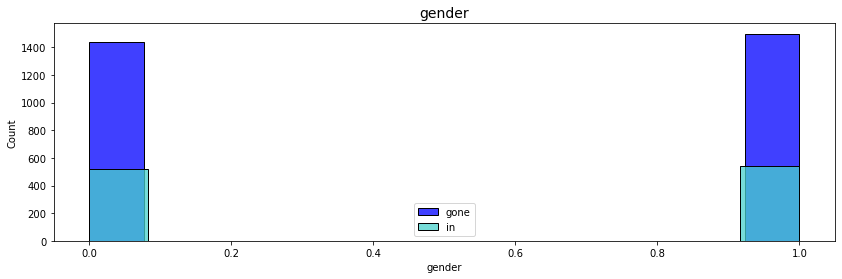

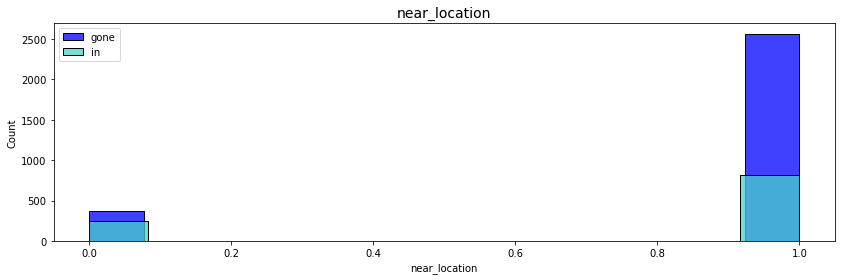

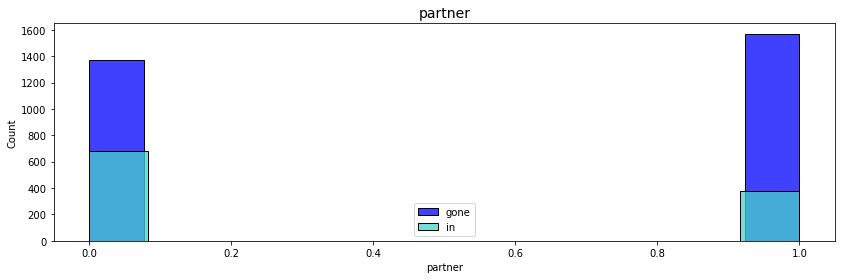

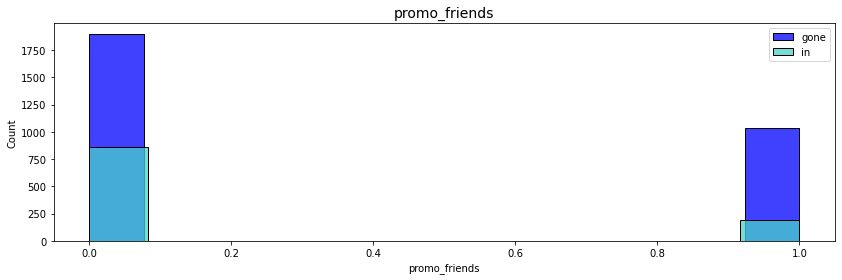

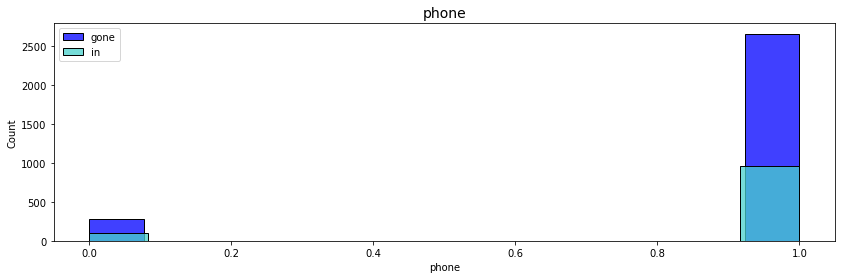

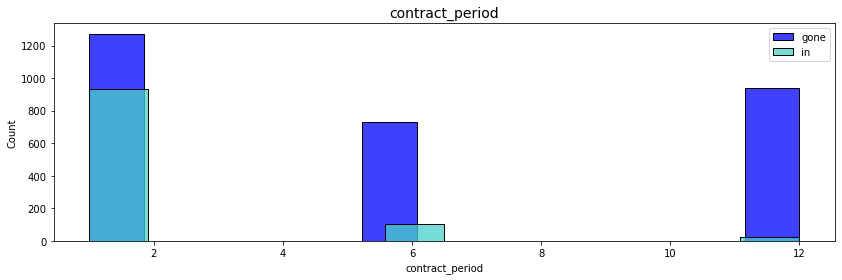

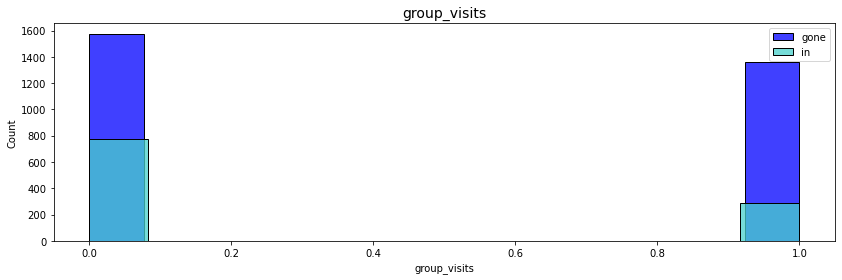

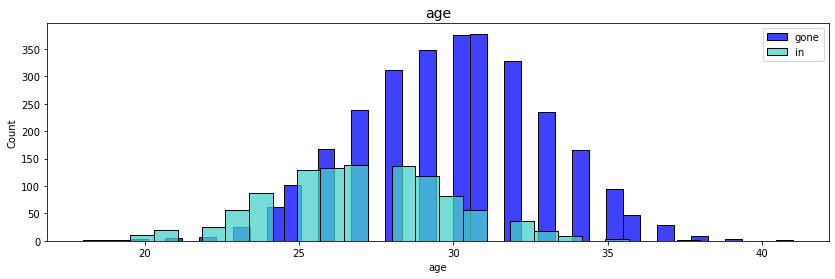

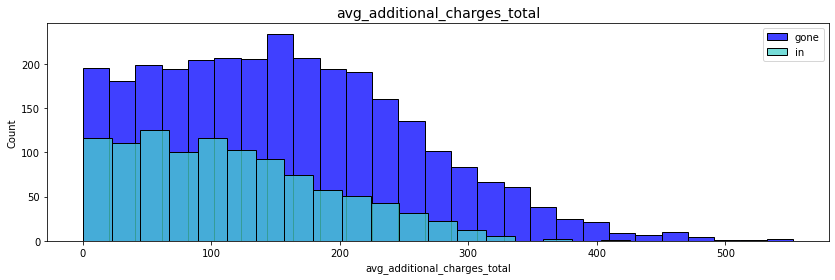

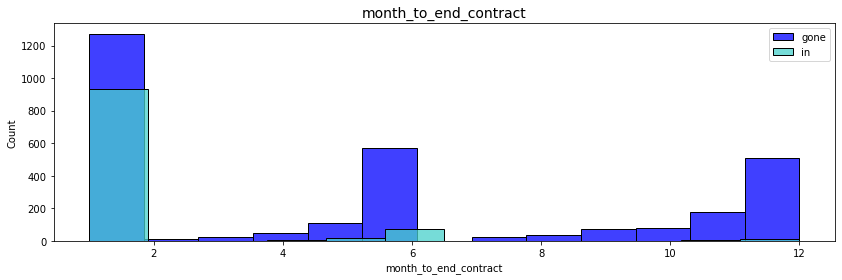

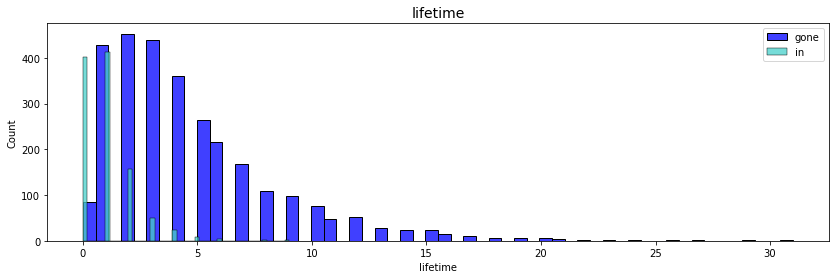

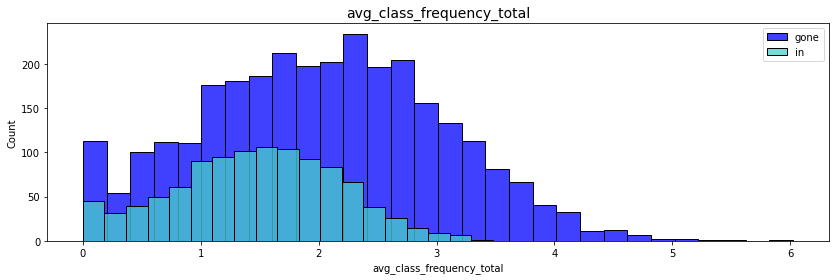

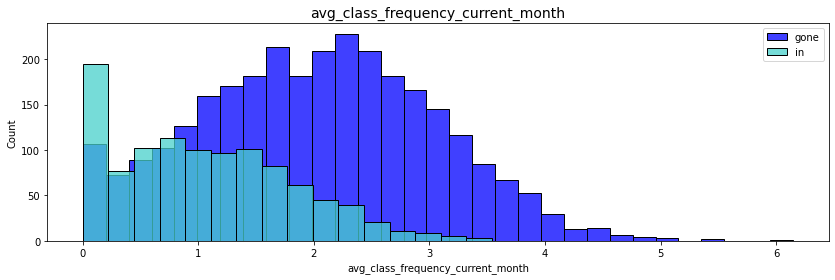

In [9]:
for prop in churn_mean.property:
    fig = plt.figure(figsize=(14,4))
    sns.histplot(df.query('churn == 0')[prop], label='gone', color="Blue")
    sns.histplot(df.query('churn == 1')[prop], label='in', color="MediumTurquoise")
    plt.title(prop, fontsize=14)
    plt.legend()
    plt.show()

In [10]:
cm = df.corr()  # матрица корреляции
cm

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


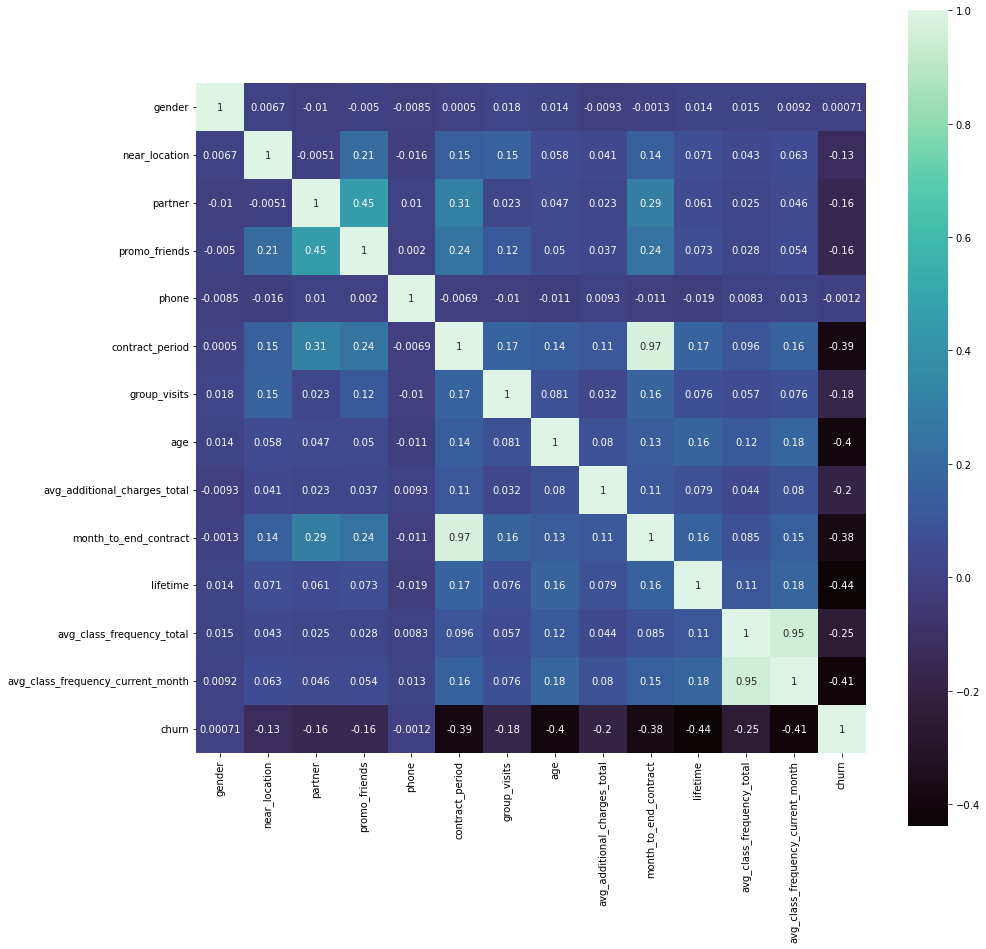

In [11]:
fig = plt.subplots(figsize = (15,15))
sns.color_palette("tab10")
sns.heatmap(cm, annot = True, square = True, cmap="mako")
plt.show()

In [12]:
# Рассмотрим свойства с бинарными значениями
binars = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']
for i in binars:
    df_ = df[['churn', i]].reset_index().groupby(['churn',i]).agg({'count'})
    df_.reset_index(inplace=True)
    df_['share_abs'] = df_['index'] / len(df)
    df_['share_%'] = df_.share_abs.map(lambda x: '{:.2%}'.format(x))
    display(df_)

,churn,gender,index,share_abs,share_%
,,,count,,
0,0,0,1440,0.36000,36.00%
1,0,1,1499,0.37475,37.48%
2,1,0,519,0.12975,12.97%
3,1,1,542,0.13550,13.55%


,churn,near_location,index,share_abs,share_%
,,,count,,
0,0,0,373,0.09325,9.32%
1,0,1,2566,0.64150,64.15%
2,1,0,246,0.06150,6.15%
3,1,1,815,0.20375,20.38%


,churn,partner,index,share_abs,share_%
,,,count,,
0,0,0,1369,0.34225,34.23%
1,0,1,1570,0.39250,39.25%
2,1,0,684,0.17100,17.10%
3,1,1,377,0.09425,9.43%


,churn,promo_friends,index,share_abs,share_%
,,,count,,
0,0,0,1900,0.47500,47.50%
1,0,1,1039,0.25975,25.97%
2,1,0,866,0.21650,21.65%
3,1,1,195,0.04875,4.88%


,churn,phone,index,share_abs,share_%
,,,count,,
0,0,0,283,0.07075,7.07%
1,0,1,2656,0.66400,66.40%
2,1,0,103,0.02575,2.57%
3,1,1,958,0.23950,23.95%


,churn,group_visits,index,share_abs,share_%
,,,count,,
0,0,0,1575,0.39375,39.38%
1,0,1,1364,0.34100,34.10%
2,1,0,776,0.19400,19.40%
3,1,1,285,0.07125,7.12%


### **Вывод**

* Изменчивость признаков (стандартное отклонение), обозначенных в бинарном виде, варьируется в пределах абсолютных величин статусов данных признаков `[0, 1]`: минимальна для признака «предоставление контактного телефона» `(~0.3)` и максимальна для указания пола клиента `(~0.5)`
* Стандартное отклонение для небинарных признаков варьируется в широких пределах и зависит от единицы измерения, например: время и деньги. Для временного признака минимальная изменчивость соответствует показателю `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента и равна `0,97`, максимальная – для `Contract_period` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год) и равна `4,55`. Для денежного признака (единственного) стандартное отклонение равно `96,36`у.е.
* *Следует отметить, что сравнение признаков с различными единицами измерения и/или логикой сбора данных некорректно. Данные показатели изменчивости приведены в справочных целях.*




* `gender` — пол	– находится приблизительно на одном уровне для мужчин и женщин в группах посетителей, оставшихся в заведении и прекративших пользоваться услугами: 36-37% остаются,  около 13% уходят
* `Near_Location`  (близость расположения) – влияет значительно: 64% пользователей услуг остаются против 9%, проживающих рядом. Для проживающих далеко от месторасположения центра 20% уходят, 6% остаются
* `Partner` (партнерская программа) – влияет на отток клиентов, остаются при партнерской программе и без нее 34% и 39% соответственно, тогда как уходят без партнерской программы 17%, а с ней – 9%
* `Promo_friends` (приведи друга) – влияет на отток клиентов, остаются без нее и сней 47% и 26% соответственно, а уходят без нее значительно больше чем с ней – 21% против 4%
* `Phone` (предоставление контактного телефона) – в обоих группах клиентов значительно больше тех, кто предоставляет контактных телефон: в ушедших – 24% против 3%, в остающихся – 66% против 7%
* `Group_visits`  (групповые визиты) – наличие общение между посетителями положительно влияет на удержание клиентов – 39% таких клиентов остаются против 19% ушедших, без нее 34% клиентов остаются, 7% уходят

* `Age` — возраст – для ушедших выражен возрастной пик в районе 27 – 33 лет, для оставшихся клиентов пик выражен неявно и растянут на промежутке 24 – 31 года
* `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра – уходят платящие клиента с пиком в районе 150у.е. до 600у.е., остаются менее платящие клиенты с менее выраженным пиком в районе от 0 до 100у.е.
* `Month_to_end_contract — срок до окончания текущего действующего абонемента (в месяцах): уходящие клиенты не ждут 1, 5 и 12 месяцев до окончания действующего абонемента в количестве порядка 1200, 600 и 500 человек соответственно
* `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах) – клиенты уходят в пике после 3-5 месяцев с момента первого обращения
* `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента – уходящие клиенты посещают в среднем центр до 4-х раз в неделю, остающиеся – до 3-х раз в неделю
* `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц – за последний меся уходящие клиенты посещали центр в пике до 4-х раз, остающиеся – до 2-3х раз



* Коррелирующими параметрами являются `Contract_period`' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год) и `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах) с коэффициентом корреляции **0,97**,

* а также `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц и `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон с коэффициентом корреляции **0,95**




## Шаг 3. Прогнозирование оттока клиентов

В данных присутствуют две пары коллинеарных признаков: 
* `Contract_period` - `Month_to_end_contract` 
* `Avg_class_frequency_total` - `Avg_class_frequency_current_month`

Удалим по одному от каждой пары в датасете:


In [13]:
dfс = df.drop(['month_to_end_contract', 'avg_class_frequency_total'], axis=1)
dfс.head(2)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,3,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,7,1.910244,0


### Разбиение и подготовка данных

In [14]:
X=dfс.drop('churn', axis=1)   # исключение целевой переменной из набора признаков
y=dfс['churn']                # выделение целевой переменной из набора признаков в отдельную переменную

# разбиение данных на обучающую и тестовую выборки в пропорции 80/20 соответственно и с отсутствием случайности разбиения
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()                 # создание объекта стандартизации          
scaler.fit(X_train)                       # обучение стандартизатора на обучающей выборке
X_train_st = scaler.transform(X_train)    # стандартизация обучающей выборки
X_test_st =  scaler.transform(X_test)     # стандартизация тестовой выборки

In [15]:
print('Доля обучающей выборки из общей: ', X_train.shape[0] / (X_train.shape[0] + X_test.shape[0])*100, '%')
print('Доля тестовой выборки из общей: ', X_test.shape[0] / (X_train.shape[0] + X_test.shape[0])*100, '%')

Доля обучающей выборки из общей:  80.0 %
Доля тестовой выборки из общей:  20.0 %


или

In [16]:
print('Доля обучающей выборки из общей: ', len(y_train) / (len(y_train) + len(y_test))*100, '%')
print('Доля тестовой выборки из общей: ', len(y_test) / (len(y_train) + len(y_test))*100, '%')

Доля обучающей выборки из общей:  80.0 %
Доля тестовой выборки из общей:  20.0 %


### Обучение модели

#### Логистическая регрессия

In [17]:
lr_model = LogisticRegression(random_state = 0)  # объект логистической регрессии с отсутствием случайности разбиения
lr_model.fit(X_train_st, y_train)                # обучение модели на обучающих данных
lr_predictions = lr_model.predict(X_test_st)     # получение прогноза на тестовой выборке
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]  # вероятность принадлежности объектов к классам

#### Случайный лес

In [18]:
# объект -модель "случайный лес" с макс.кол-вом деревьев 100 и отсутствием случайности разбиения
rf_model = RandomForestClassifier(n_estimators = 100,random_state = 0)
rf_model.fit(X_train_st, y_train)                    # обучение модели на обучающих данных
rf_predictions = rf_model.predict(X_test_st)         # получение прогноза на тестовой выборке
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]   # вероятность принадлежности объектов к классам

#### Оценка метрик

In [19]:
def metrics_evaluation(header, y_true, y_pred, y_proba):
    print(header)
    print('Accuracy:', accuracy_score(y_true, y_pred).round(3))
    print('Precision:', precision_score(y_true, y_pred).round(3))
    print('Recall:', recall_score(y_true, y_pred).round(3))
    print('F1:', f1_score(y_true, y_pred).round(3))
    print('ROC_AUC:', roc_auc_score(y_true, y_proba).round(3))
    print()

metrics_evaluation('\033[1m'+'Метрики: логистическая регрессия'+'\033[0m\n', y_test, lr_predictions, lr_probabilities)
metrics_evaluation('\033[1m'+'Метрики: случайный лес'+'\033[0m\n', y_test, rf_predictions, rf_probabilities)

Метрики: логистическая регрессия

Accuracy: 0.902
Precision: 0.791
Recall: 0.823
F1: 0.807
ROC_AUC: 0.962

Метрики: случайный лес

Accuracy: 0.895
Precision: 0.813
Recall: 0.747
F1: 0.779
ROC_AUC: 0.948



<Figure size 432x288 with 0 Axes>

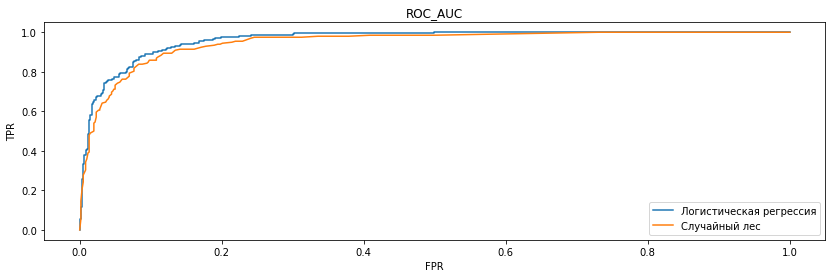

In [20]:
plt.figure(0).clf()
fig = plt.figure(figsize=(14,4))
fpr, tpr, thresh = metrics.roc_curve(y_test, lr_probabilities)
plt.plot(fpr,tpr,label="Логистическая регрессия")
fpr, tpr, thresh = metrics.roc_curve(y_test, rf_probabilities)
plt.plot(fpr,tpr,label="Случайный лес")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_AUC')
plt.legend()
plt.show()

### **Вывод**
* **Accuracy**: лучше показала модель Логистической регрессии: 0.902 против 0.895 Случайного леса
* **Precision**: лучше показала модель Случайного леса: 0.791 против 0.813 Логистической регрессии
* **Recall**: лучше показала модель Логистической регрессии: 0.823 против 0.747 Случайного леса
* **F1**: лучше показала модель Логистической регрессии: 0.807 против 0.779 Случайного леса
* **ROC_AUC**: лучше показала модель Логистической регрессии: 0.962 против 0.948 Случайного леса. С точки зрения графического отображения наглядно заметно, что Логистическая регрессия лучше отрабатывает ложно-позитивные события


## Шаг 4. Кластеризация пользователй

### Кластеризация без целевого признака

In [21]:
df_cl_1 = df.drop('churn', axis=1)      # исключение целевой переменной и стандартизация данных
X_sc = scaler.fit_transform(df_cl_1)    # стандартизация

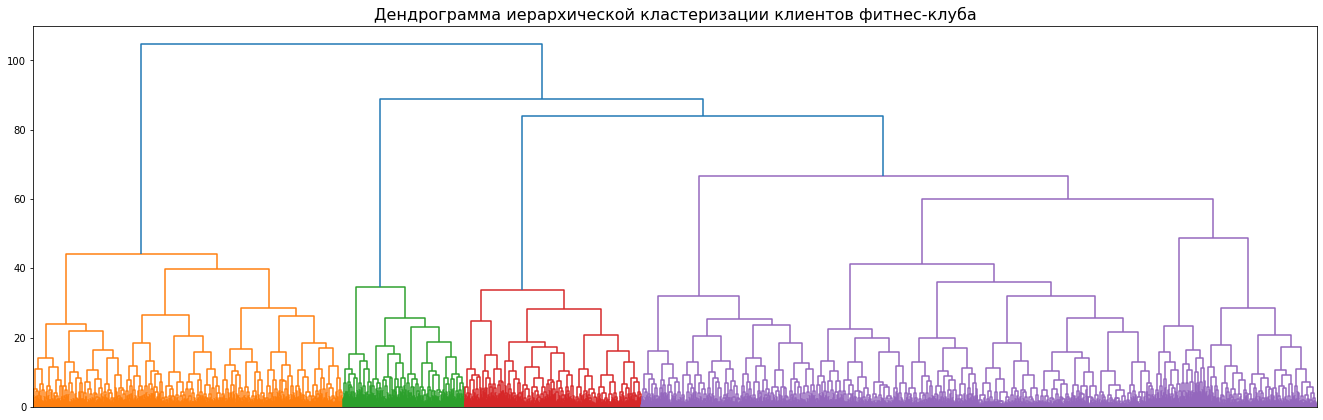

In [22]:
linked = linkage(X_sc, method = 'ward')   #матрица расстояний
plt.figure(figsize=(23, 7))  
dendrogram(linked, orientation='top', no_labels=True)   # дендрограмма с таблицей связок между объектами
plt.title('Дендрограмма иерархической кластеризации клиентов фитнес-клуба', size=16)
plt.show() 

In [23]:
ro = KMeans(n_clusters = 5, random_state=0)     # модель k_means с количеством кластеров 5
cluster_number = ro.fit_predict(X_sc)           # разбиение на кластеры в пределах [0; 4]

In [24]:
df_cl_1['cluster'] = cluster_number               # сохранение метки кластера в поле датасета

In [25]:
df_cl_1_mean = df_cl_1.groupby('cluster').mean().T
df_cl_1_mean

cluster,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
near_location,0.959406,0.862338,0.000000,1.000000,0.976134
partner,0.783168,0.470130,0.463366,0.350238,0.356802
promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
phone,1.000000,0.000000,1.000000,1.000000,0.998807
contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
age,29.982178,29.301299,28.477228,28.167987,30.125298
avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


### Кластеризация с целевым признаком

In [26]:
X_sc = scaler.fit_transform(df)    # стандартизация

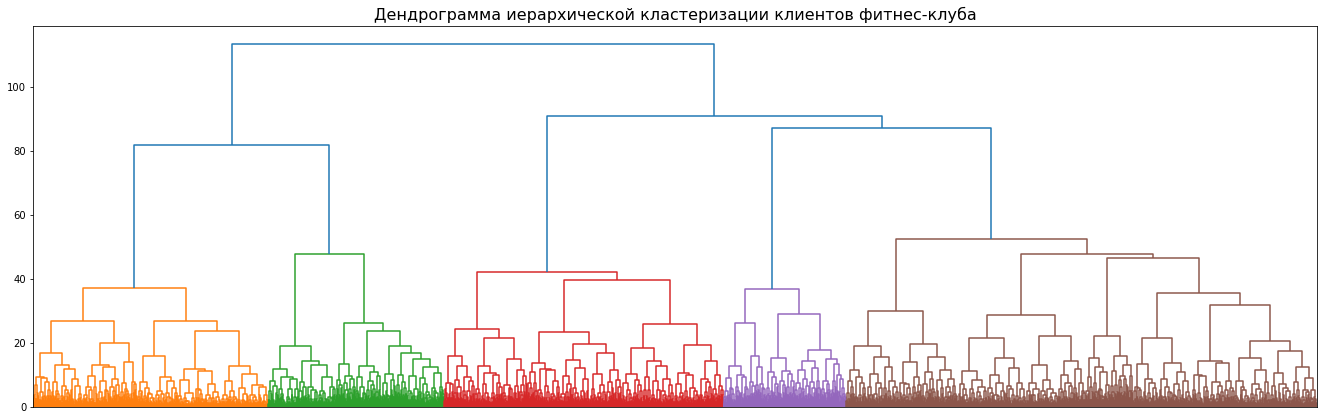

In [27]:
linked = linkage(X_sc, method = 'ward')   #матрица расстояний
plt.figure(figsize=(23, 7))  
dendrogram(linked, orientation='top', no_labels=True)   # дендрограмма с таблицей связок между объектами
plt.title('Дендрограмма иерархической кластеризации клиентов фитнес-клуба', size=16)
plt.show() 

In [28]:
ro = KMeans(n_clusters = 5, random_state=0)     # модель k_means с количеством кластеров 5
cluster_number = ro.fit_predict(X_sc)           # разбиение на кластеры в пределах [0; 4]

In [29]:
df['cluster'] = cluster_number               # сохранение метки кластера в поле датасета

In [30]:
df_cl_2_mean = df.groupby('cluster').mean().T
df_cl_2_mean

cluster,0,1,2,3,4
gender,0.503676,0.492829,0.507917,0.521186,0.518895
near_location,0.000000,0.936115,1.000000,0.996610,0.968023
partner,0.459559,0.764016,0.323995,0.282203,0.744186
promo_friends,0.075368,0.534550,0.213155,0.208475,0.526163
phone,0.917279,0.919166,0.903776,0.904237,0.873547
contract_period,2.069853,10.447197,1.546894,1.882203,8.859012
group_visits,0.211397,0.516297,0.287454,0.452542,0.534884
age,28.522059,29.962190,26.926918,30.237288,29.728198
avg_additional_charges_total,132.741216,161.853561,113.173051,157.988625,162.907495
month_to_end_contract,1.950368,9.477184,1.500609,1.794915,8.155523


### Распределение признаков для кластеров

In [31]:
df.head(2)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,4
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,1


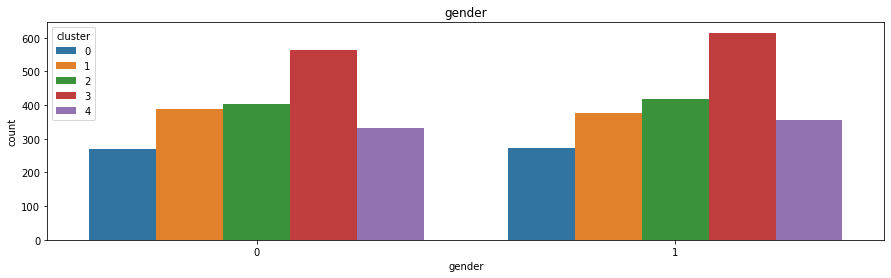

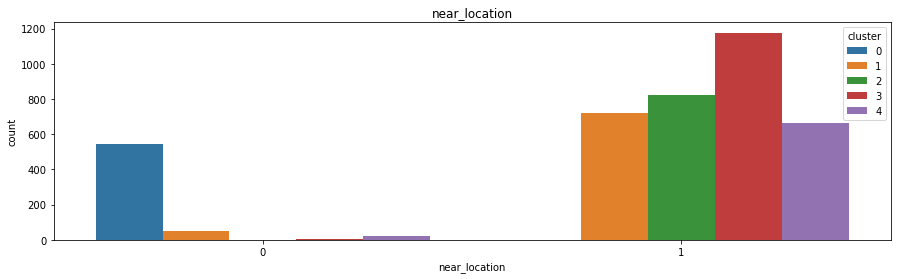

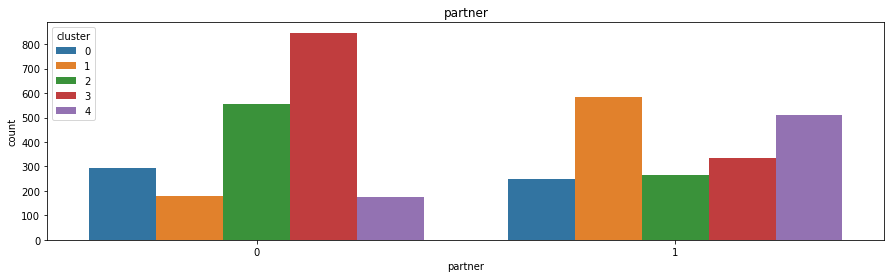

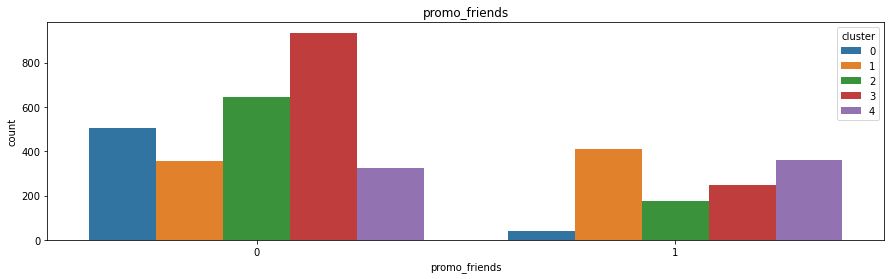

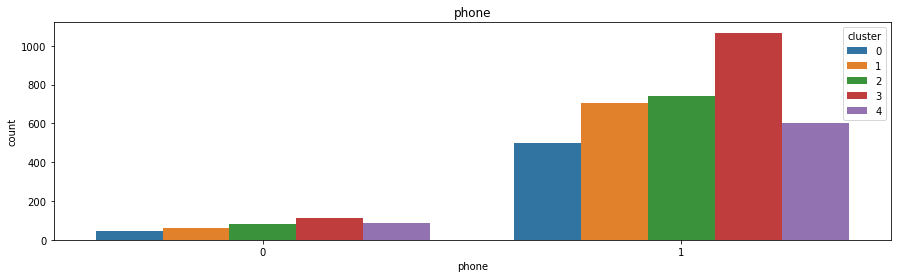

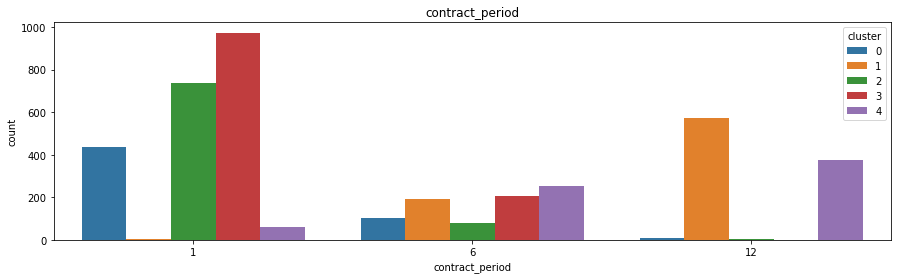

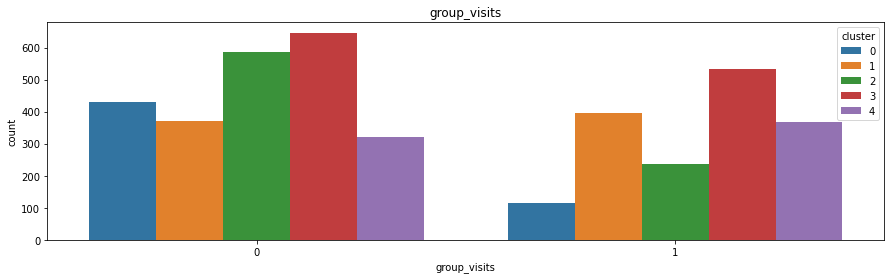

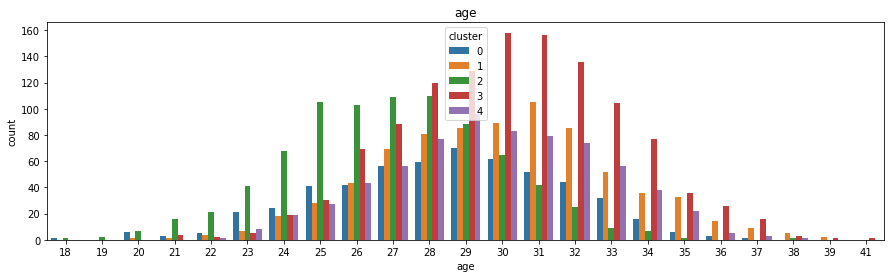

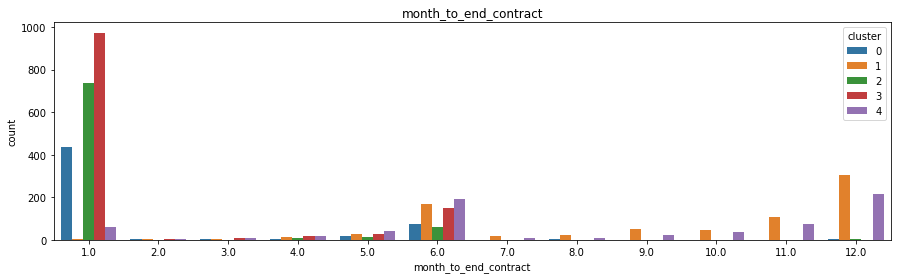

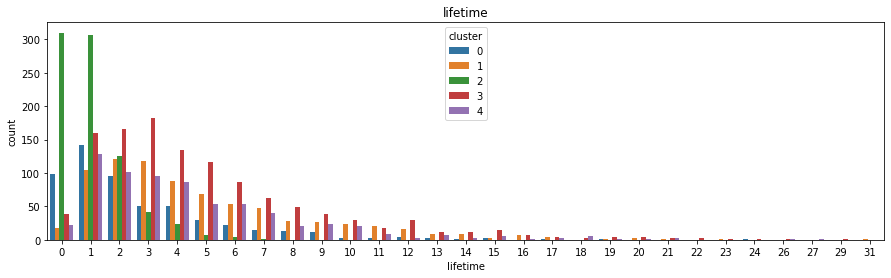

In [32]:
for prop in ['gender','near_location','partner','promo_friends','phone','contract_period','group_visits', 'age','month_to_end_contract','lifetime']:
    plt.figure(figsize=(15, 4))
    sns.countplot(x = df[prop], hue='cluster', data=df)
    plt.title(prop)
    plt.show()

### Отток в кластерах

In [33]:
df.groupby('cluster').agg({'churn':'mean'}).sort_values('churn')

,churn
cluster,
3,0.003390
1,0.007823
4,0.024709
0,0.450368
2,0.961023


### **Вывод**
* `gender`: клиенты по полу распределены в кластерах равномерно
* `near_location`: в кластере №3 живут далеко от ФЦ, в №4 – близко, в остальных кластерах клиенты в подавляющем большинстве живут близко
* `partner`: партнерской программой пользуются в основном в кластере № 0 (0,74)
* `promo_friends`: в акции «приведи друга» почти не пользуются в кластере № 3 (0,07)
* `phone`: во всех кластерах клиенты оставляют телефон на высоком уровне (0,87 – 0,92)
* `contract_period`: в кластере №0 - максимальное среднее абонемента: 10,4 месяца
* `group_visits`: в кластере №3 - минимальные кол-во клиентов в группах: 0,21, остальные кластеры: от 0,29 до 0,53
* `age`: возраст в кластерах распределен равномерно в пределах от 27 до 30 лет по среднему
* `avg_additional_charges_total`: дополнительные услуги покупаются клиентами минимально в кластере № 4 на уровне 113,2у.е. и кластере № 3 на уровне 132,7у.е., в остальных – на уровне (158, 163)
* `month_to_end_contract`: кластер №1 и 4 имеет максимум среди кластеров в кол-ве месяцев до конца абонемента, которые равны 9,5 и 8,2 соответственно
* `lifetime`: время с момента первого обращения в ФЦ минимально в кластере «№2 (1) и максимально в в кластерах №1 и 4: 4,8 и 4,4 соответственно
* `avg_class_frequency_total`: среднее посещений в неделю за все время с начала действия абонемента имеет минимум в кластере №4 и равно 0,96 и максимум в кластере №1 и равно 2,79
* `avg_class_frequency_current_month`: среднее посещений в неделю за прошедший месяц минимально в кластере №2 и равно 1,04 и максимально в кластере №2 и равно 2,79



Также:
* `age`: во всех кластерах возраст визуально имеем нормальное распределение
* `lifetime` во всех кластерах имеет затухающее распределение количества по параметру '*время с момента первого обращения в фитнес-центр (в месяцах)*'

Отток в кластерах:
* Наиболее надежными с точки зрения оттока являются кластеры №№ 0 и 4 с показателями 2,8% и 6,8% соответственно
* Наименее надежны по оттоку кластеры №№ 2 и 3 с показателями 44% и 51% соответственно

## **Общий вывод**

**Данные**

* Данные представлены в одном файле
* Пропуски отсуствуют
* Дубликаты отсутствуют
* Названия колонок преобразованы в соответствии с требованиями ***snake_style***
* В данных присутсвуют признаки в кол-ве 14 в виде целых и действительных чисел



**Ислледовательский анализ**

* Изменчивость признаков (стандартное отклонение), обозначенных в бинарном виде, варьируется в пределах абсолютных величин статусов данных признаков `[0, 1]`: минимальна для признака «предоставление контактного телефона» `(~0.3)` и максимальна для указания пола клиента `(~0.5)`
* Стандартное отклонение для небинарных признаков варьируется в широких пределах и зависит от единицы измерения, например: время и деньги. Для временного признака минимальная изменчивость соответствует показателю `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента и равна `0,97`, максимальная – для `Contract_period` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год) и равна `4,55`. Для денежного признака (единственного) стандартное отклонение равно `96,36`у.е.
* *Следует отметить, что сравнение признаков с различными единицами измерения и/или логикой сбора данных некорректно. Данные показатели изменчивости приведены в справочных целях.*


**Отток клиентов: параметры**

* `gender` — пол	– находится приблизительно на одном уровне для мужчин и женщин в группах посетителей, оставшихся в заведении и прекративших пользоваться услугами: 36-37% остаются,  около 13% уходят
* `Near_Location`  (близость расположения) – влияет значительно: 64% пользователей услуг остаются против 9%, проживающих рядом. Для проживающих далеко от месторасположения центра 20% уходят, 6% остаются
* `Partner` (партнерская программа) – влияет на отток клиентов, остаются при партнерской программе и без нее 34% и 39% соответственно, тогда как уходят без партнерской программы 17%, а с ней – 9%
* `Promo_friends` (приведи друга) – влияет на отток клиентов, остаются без нее и сней 47% и 26% соответственно, а уходят без нее значительно больше чем с ней – 21% против 4%
* `Phone` (предоставление контактного телефона) – в обоих группах клиентов значительно больше тех, кто предоставляет контактных телефон: в ушедших – 24% против 3%, в остающихся – 66% против 7%
* `Group_visits`  (групповые визиты) – наличие общение между посетителями положительно влияет на удержание клиентов – 39% таких клиентов остаются против 19% ушедших, без нее 34% клиентов остаются, 7% уходят

* `Age` — возраст – для ушедших выражен возрастной пик в районе 27 – 33 лет, для оставшихся клиентов пик выражен неявно и растянут на промежутке 24 – 31 года
* `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра – уходят платящие клиента с пиком в районе 150у.е. до 600у.е., остаются менее платящие клиенты с менее выраженным пиком в районе от 0 до 100у.е.
* `Month_to_end_contract — срок до окончания текущего действующего абонемента (в месяцах): уходящие клиенты не ждут 1, 5 и 12 месяцев до окончания действующего абонемента в количестве порядка 1200, 600 и 500 человек соответственно
* `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах) – клиенты уходят в пике после 3-5 месяцев с момента первого обращения
* `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента – уходящие клиенты посещают в среднем центр до 4-х раз в неделю, остающиеся – до 3-х раз в неделю
* `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц – за последний меся уходящие клиенты посещали центр в пике до 4-х раз, остающиеся – до 2-3х раз



* Коррелирующими параметрами являются `Contract_period`' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год) и `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах) с коэффициентом корреляции **0,97**,

* а также `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц и `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон с коэффициентом корреляции **0,95**


**Метрики моделей**


* **Accuracy**: лучше показала модель Логистической регрессии: 0.902 против 0.895 Случайного леса
* **Precision**: лучше показала модель Случайного леса: 0.791 против 0.813 Логистической регрессии
* **Recall**: лучше показала модель Логистической регрессии: 0.823 против 0.747 Случайного леса
* **F1**: лучше показала модель Логистической регрессии: 0.807 против 0.779 Случайного леса
* **ROC_AUC**: лучше показала модель Логистической регрессии: 0.962 против 0.948 Случайного леса. С точки зрения графического отображения наглядно заметно, что Логистическая регрессия лучше отрабатывает ложно-позитивные события


**Кластеризация**
* `gender`: клиенты по полу распределены в кластерах равномерно
* `near_location`: в кластере №3 живут далеко от ФЦ, в №4 – близко, в остальных кластерах клиенты в подавляющем большинстве живут близко
* `partner`: партнерской программой пользуются в основном в кластере № 0 (0,74)
* `promo_friends`: в акции «приведи друга» почти не пользуются в кластере № 3 (0,07)
* `phone`: во всех кластерах клиенты оставляют телефон на высоком уровне (0,87 – 0,92)
* `contract_period`: в кластере №0 - максимальное среднее абонемента: 10,4 месяца
* `group_visits`: в кластере №3 - минимальные кол-во клиентов в группах: 0,21, остальные кластеры: от 0,29 до 0,53
* `age`: возраст в кластерах распределен равномерно в пределах от 27 до 30 лет по среднему
* `avg_additional_charges_total`: дополнительные услуги покупаются клиентами минимально в кластере № 4 на уровне 113,2у.е. и кластере № 3 на уровне 132,7у.е., в остальных – на уровне (158, 163)
* `month_to_end_contract`: кластер №1 и 4 имеет максимум среди кластеров в кол-ве месяцев до конца абонемента, которые равны 9,5 и 8,2 соответственно
* `lifetime`: время с момента первого обращения в ФЦ минимально в кластере «№2 (1) и максимально в в кластерах №1 и 4: 4,8 и 4,4 соответственно
* `avg_class_frequency_total`: среднее посещений в неделю за все время с начала действия абонемента имеет минимум в кластере №4 и равно 0,96 и максимум в кластере №1 и равно 2,79
* `avg_class_frequency_current_month`: среднее посещений в неделю за прошедший месяц минимально в кластере №2 и равно 1,04 и максимально в кластере №2 и равно 2,79

Также:
* `age`: во всех кластерах возраст визуально имеем нормальное распределение
* `lifetime` во всех кластерах имеет затухающее распределение количества по параметру '*время с момента первого обращения в фитнес-центр (в месяцах)*'

**Отток в кластерах**
* Наиболее надежными с точки зрения оттока являются кластеры №№ 0 и 4 с показателями 2,8% и 6,8% соответственно
* Наименее надежны по оттоку кластеры №№ 2 и 3 с показателями 44% и 51% соответственно





## **Рекомендации**
Для удержания клиентов можно предложить следующие шаги:
* более широкое распространение партнерских программ
* промотирование программ с более длительным абонентским периодом
* групповое посещение
* расширение ассортимента дополнительных услуг